<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:200%;text-align:center;border-radius:15px 15px;">EDA for Auto 2W Loan Approval</p>

### 1) Problem statement
- To simplify loan approval process for 2W, we need to create smooth process where all details of customer like Age, Gender, Income, Credit score etc


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/yashkmd/credit-profile-two-wheeler-loan-dataset 
- The data consists of 15 columns and 278k rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/credit_data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


#### Shape of the dataset

In [4]:
df.shape

(279856, 15)

### 2.2 Dataset information

-->Demographics: Age, Gender, State, and City provide a snapshot of the applicant's background.

-->Financial Information: Income, Credit Score, and Credit History Length offer insights into the applicant's financial stability and credit behavior.

-->Loan Details: The dataset sheds light on the specifics of the loan the applicant is seeking, with details like 

-->Loan Amount, Loan Tenure, and Loan to Value (LTV) Ratio.

-->Employment Information: The dataset includes both a general employment profile (e.g., Salaried, Self-Employed) and a specific occupation, giving a nuanced view of the applicant's employment status.

-->Profile Score: A composite score, ranging from 0 to 100, represents the overall credit profile of the applicant. This score can serve as a quick reference for gauging the creditworthiness of an individual.

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

Age                             0
Gender                          0
Income                          0
Credit Score                    0
Credit History Length           0
Number of Existing Loans        0
Loan Amount                     0
Loan Tenure                     0
Existing Customer               0
State                           0
City                            0
LTV Ratio                       0
Employment Profile              0
Profile Score                   0
Occupation                  18272
dtype: int64

Occupation has missing values

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

100814

In [7]:
df = df.drop_duplicates()

### 3.3 Check data types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179042 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       179042 non-null  int64  
 1   Gender                    179042 non-null  object 
 2   Income                    179042 non-null  int64  
 3   Credit Score              179042 non-null  int64  
 4   Credit History Length     179042 non-null  int64  
 5   Number of Existing Loans  179042 non-null  int64  
 6   Loan Amount               179042 non-null  int64  
 7   Loan Tenure               179042 non-null  int64  
 8   Existing Customer         179042 non-null  object 
 9   State                     179042 non-null  object 
 10  City                      179042 non-null  object 
 11  LTV Ratio                 179042 non-null  float64
 12  Employment Profile        179042 non-null  object 
 13  Profile Score             179042 non-null  int64 

### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

Age                            53
Gender                          3
Income                        201
Credit Score                  551
Credit History Length         606
Number of Existing Loans       11
Loan Amount                 55681
Loan Tenure                   348
Existing Customer               2
State                          10
City                           23
LTV Ratio                   80874
Employment Profile              5
Profile Score                 101
Occupation                     14
dtype: int64

### 3.5 Check statistics of data set

In [10]:
df.describe()

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
count,179042.000000,179042.000000,179042.000000,179042.000000,179042.000000,179042.000000,179042.000000,179042.000000,179042.000000
mean,43.990516,76437.483942,583.097977,308.016125,4.704645,105792.567833,133.325287,71.630713,77.377772
std,15.309904,42852.725718,163.079589,175.039559,2.980465,40436.205650,96.008844,16.867650,24.496880
min,18.000000,9000.000000,300.000000,6.000000,0.000000,5294.000000,12.000000,40.000000,0.000000
25%,31.000000,42000.000000,447.000000,156.000000,2.000000,72220.000000,62.000000,58.079412,61.000000
50%,44.000000,68000.000000,584.000000,307.000000,5.000000,111284.000000,100.000000,72.153227,89.000000
75%,57.000000,104000.000000,722.000000,460.000000,7.000000,150000.000000,201.000000,86.212457,98.000000
max,70.000000,209000.000000,850.000000,611.000000,10.000000,150000.000000,359.000000,95.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

###  Exploring Data

In [11]:
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [12]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'State' variable:  ",end=" ")
print(df['State'].unique())

print("Categories in'City' variable:",end=" " )
print(df['City'].unique())

print("Categories in 'Employment Profile' variable:     ",end=" " )
print(df['Employment Profile'].unique())

print("Categories in 'Occupation' variable:     ",end=" " )
print(df['Occupation'].unique())

Categories in 'Gender' variable:      ['Male' 'Other' 'Female']
Categories in 'State' variable:   ['Karnataka' 'Uttar Pradesh' 'Tamil Nadu' 'West Bengal' 'Rajasthan'
 'Maharashtra' 'Gujarat' 'Telangana' 'Kerala' 'Delhi']
Categories in'City' variable: ['Mysuru' 'Bengaluru' 'Kanpur' 'Coimbatore' 'Lucknow' 'Kolkata' 'Jaipur'
 'Nagpur' 'Surat' 'Hyderabad' 'Chennai' 'Thiruvananthapuram' 'Udaipur'
 'New Delhi' 'Mumbai' 'Manjari' 'Dhulagori' 'Pune' 'Nellikuppam' 'Kochi'
 'Ahmedabad' 'Channarayapatna' 'Bishanpura']
Categories in 'Employment Profile' variable:      ['Salaried' 'Self-Employed' 'Freelancer' 'Student' 'Unemployed']
Categories in 'Occupation' variable:      ['Doctor' 'Software Engineer' 'Banker' 'Contractor' 'Teacher' 'Farmer'
 'Writer' 'Shopkeeper' 'Photographer' 'Student' 'Civil Servant' nan
 'Independent Consultant' 'Graphic Designer' 'Business Owner']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Age', 'Income', 'Credit Score', 'Credit History Length', 'Number of Existing Loans', 'Loan Amount', 'Loan Tenure', 'LTV Ratio', 'Profile Score']

We have 6 categorical features : ['Gender', 'Existing Customer', 'State', 'City', 'Employment Profile', 'Occupation']


<a id="3.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Exploring Data ( Visualization )</h3>

In [14]:
#Custom function for univariate analysis of numerical features
def eda_univariate_analysis_numerical(df, numeric_features):
    no_of_num_features = len(numeric_features)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = math.ceil(no_of_num_features / num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
    
    for i, (col, ax) in enumerate(zip(numeric_features, axes.flat)):
        sns.histplot(data=df, x=col, kde=True, color='green', ax=ax)
        ax.set_title(f'{col} Distribution')
    
    # Remove any empty subplots
    for i in range(no_of_num_features, num_rows * num_cols):
        fig.delaxes(axes.flat[i])
    
    plt.tight_layout()
    
    # Add a line of text
    plt.text(0.5, 0.5, "Boxplots to identify outliers", fontsize=14, ha='center')
    
    
    # Create box plot to identify outliers
    
    for col in numeric_features:
        plt.figure(figsize=(8, 2)) 
        sns.boxplot(data=df, x=col, color='skyblue')
        plt.title(f'{col} Box Plot')
    
    plt.show()
    

In [15]:
#Custom function for univariate analysis of categorical features
def eda_univariate_analysis_categorical(df, categorical_features):

    no_of_cat_features = len(categorical_features)
    num_cols = 2  # Number of columns in the subplot grid (two charts in one row)
    num_rows = math.ceil(no_of_cat_features / num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    
    for i, col in enumerate(categorical_features):
        row_index = i // num_cols  # Calculate the row index
        col_index = i % num_cols   # Calculate the column index

        sns.countplot(data=df, x=col, ax=axes[row_index, col_index], color='green')
        axes[row_index, col_index].set_title(f'{col} Distribution')
    
    # Remove any empty subplots
    for i in range(no_of_cat_features, num_rows * num_cols):
        fig.delaxes(axes.flat[i])
    
    plt.tight_layout()
    plt.show()

In [16]:
#Custom function for Bivariate analysis of categorical & Numerical features with target variable

def eda_bivariate_analysis(df, categorical_features,numeric_features,target_variable):

    # Exclude the target variable from the numeric features
    if target_variable in numeric_features:
        numeric_features.remove(target_variable)

    # Scatterplots
    num_cols = 2  # Number of columns in the subplot grid (two plots in one row)
    num_rows = (len(numeric_features)) // num_cols  # Calculate the number of rows based on features
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    
    for i, col in enumerate(numeric_features):
        row_index = i // num_cols  # Calculate the row index
        col_index = i % num_cols   # Calculate the column index

        sns.scatterplot(data=df, x=col, y=target_variable, ax=axes[row_index, col_index], color='green')
        axes[row_index, col_index].set_title(f'{col} vs {target_variable}')
    
    plt.tight_layout()
    plt.show()
    
    # Barplots
    num_cols = 2  # Number of columns in the subplot grid (two plots in one row)
    num_rows = (len(categorical_features)) // num_cols  # Calculate the number of rows based on features

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    
    for i, col in enumerate(categorical_features):
        row_index = i // num_cols  # Calculate the row index
        col_index = i % num_cols   # Calculate the column index

        sns.barplot(data=df, x=col, y=target_variable, ax=axes[row_index, col_index], color='red')
        axes[row_index, col_index].set_title(f'{target_variable} vs {col}')
    
    plt.tight_layout()
    plt.show()

<a id="3.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Univariate Analysis Numerical Features</h3>

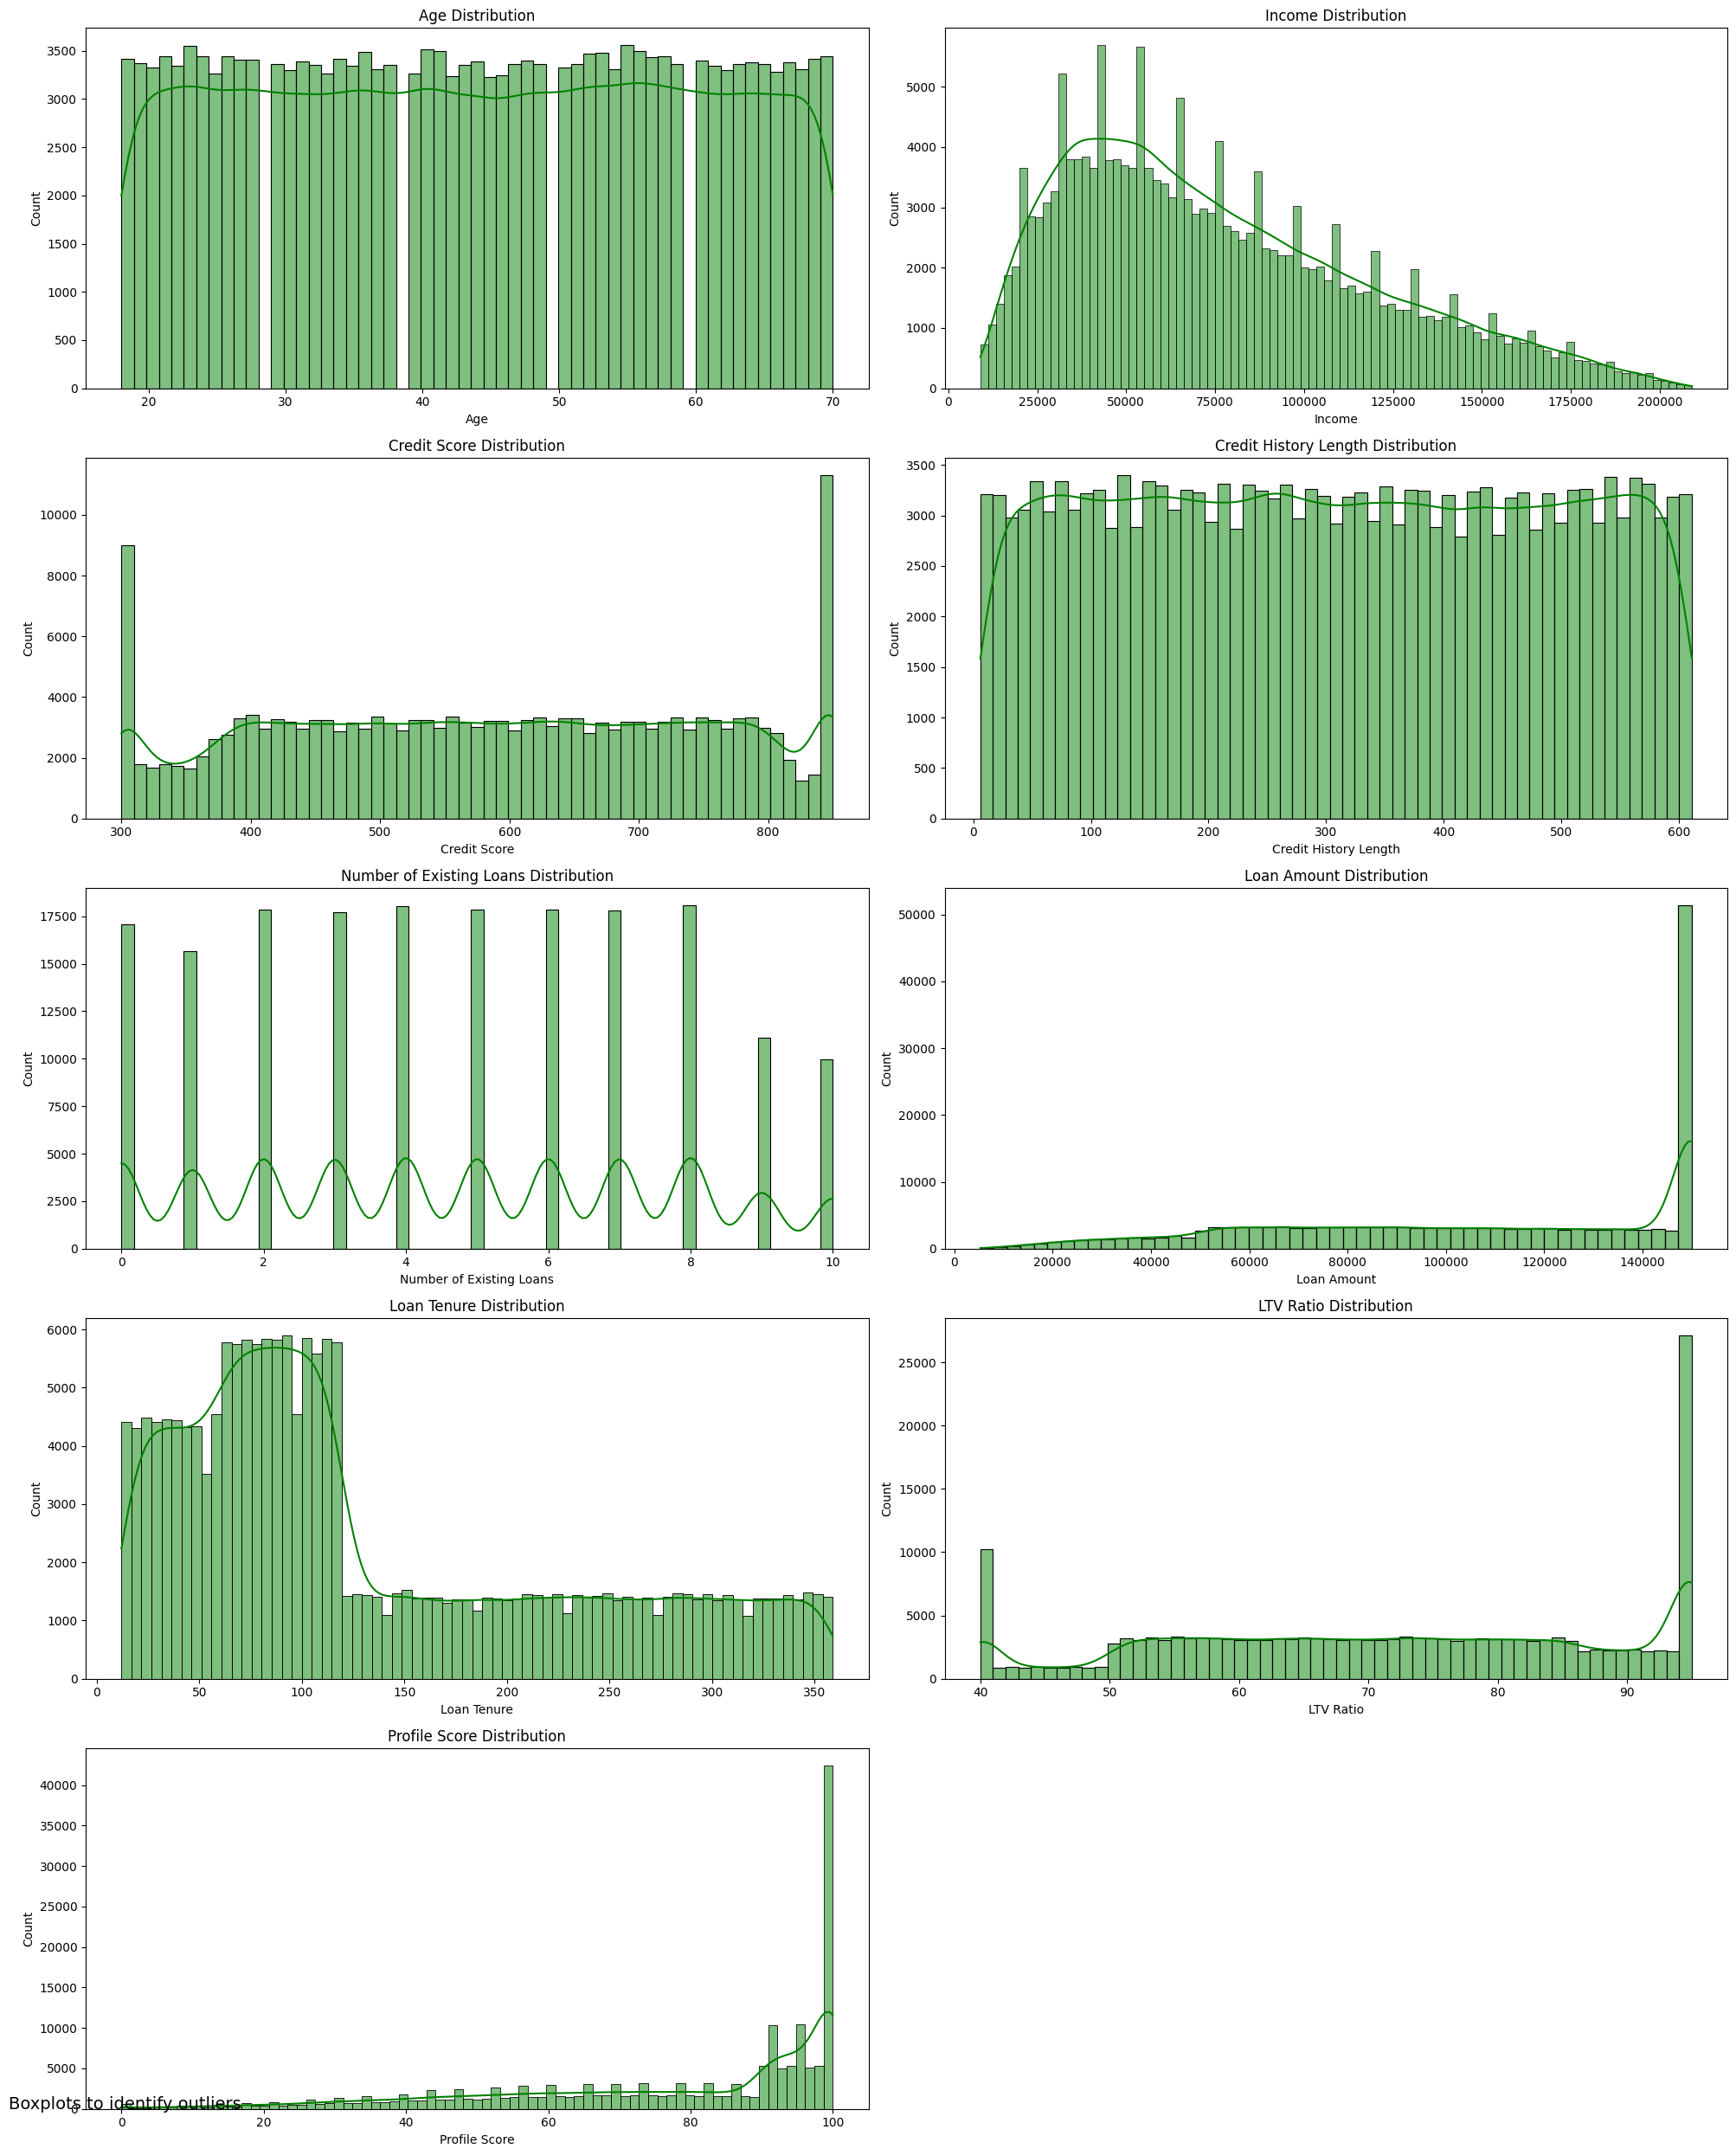

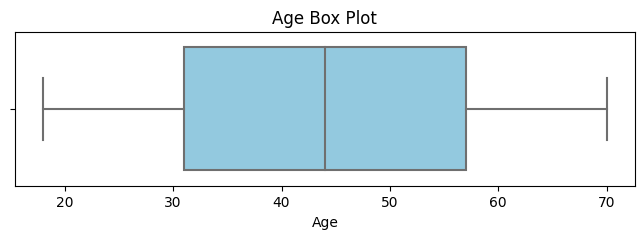

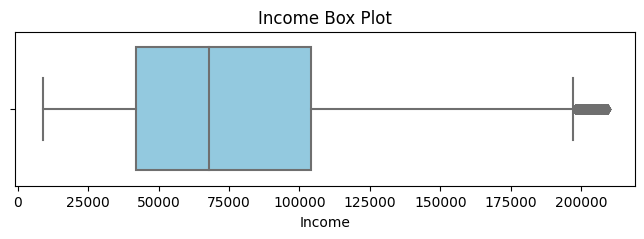

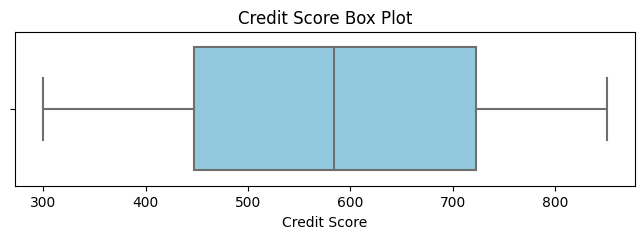

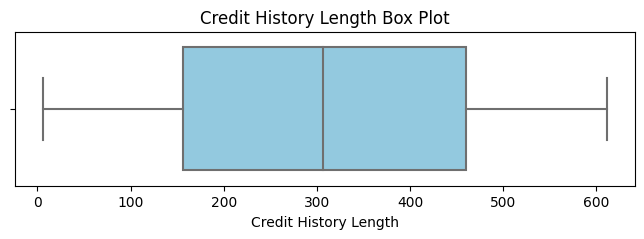

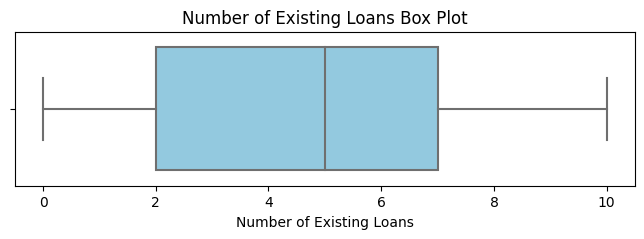

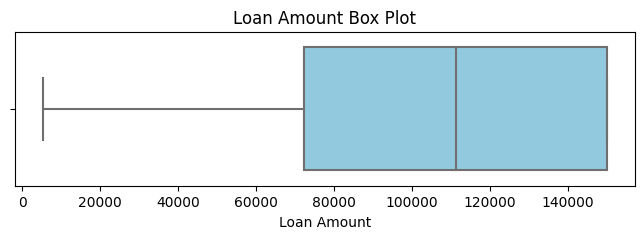

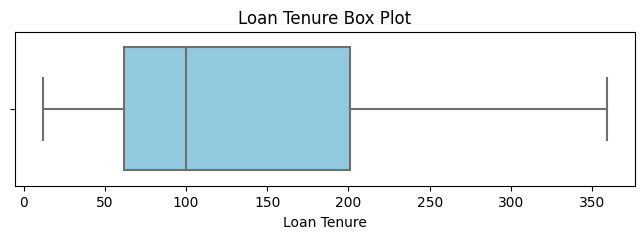

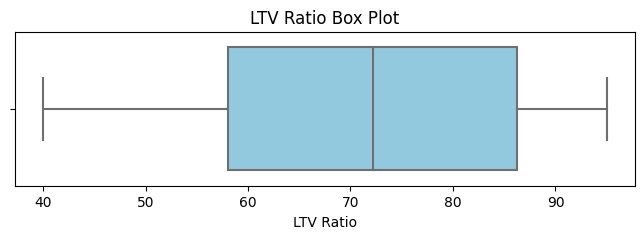

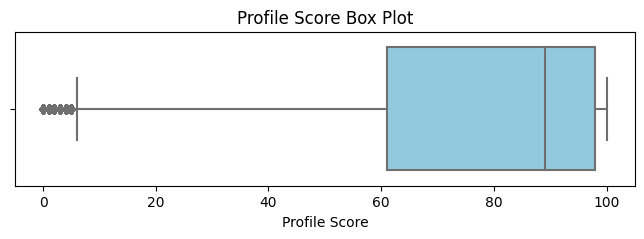

In [17]:
eda_univariate_analysis_numerical(df, numeric_features)

#### Univariate Analysis Insights (Numerical Features)
- Normal Income Range is 40k to 110k, income above 200k is outlier
- Majority applicants have profile score above 60, some outlier on lower end <10

In [18]:
df_check = df[df['Profile Score'] < 60.0]
df_check.head(10)

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
6,29,Male,15000,378,89,1,26819,108,No,Uttar Pradesh,Lucknow,95.000000,Self-Employed,25,Farmer
7,30,Other,82000,424,610,2,126550,92,No,West Bengal,Kolkata,93.634577,Salaried,58,Banker
10,69,Male,166000,384,381,1,103472,14,No,Tamil Nadu,Coimbatore,95.000000,Self-Employed,13,Shopkeeper
13,19,Female,25000,350,227,0,30156,30,No,Tamil Nadu,Chennai,64.834587,Student,49,Student
18,34,Female,44000,300,441,0,95976,55,No,West Bengal,Kolkata,91.204851,Salaried,15,Software Engineer
25,61,Female,41000,307,104,0,23296,99,No,Rajasthan,Udaipur,58.686622,Unemployed,23,NaN
28,52,Female,87000,697,26,7,141231,70,Yes,Delhi,New Delhi,94.616809,Unemployed,58,NaN
30,24,Male,15000,463,24,2,10764,48,No,Uttar Pradesh,Lucknow,78.167133,Self-Employed,49,Farmer
32,23,Female,32000,442,314,2,67958,83,No,Telangana,Hyderabad,77.542092,Freelancer,43,Independent Consultant


<a id="3.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Univariate analysis Categorical Features</h3>

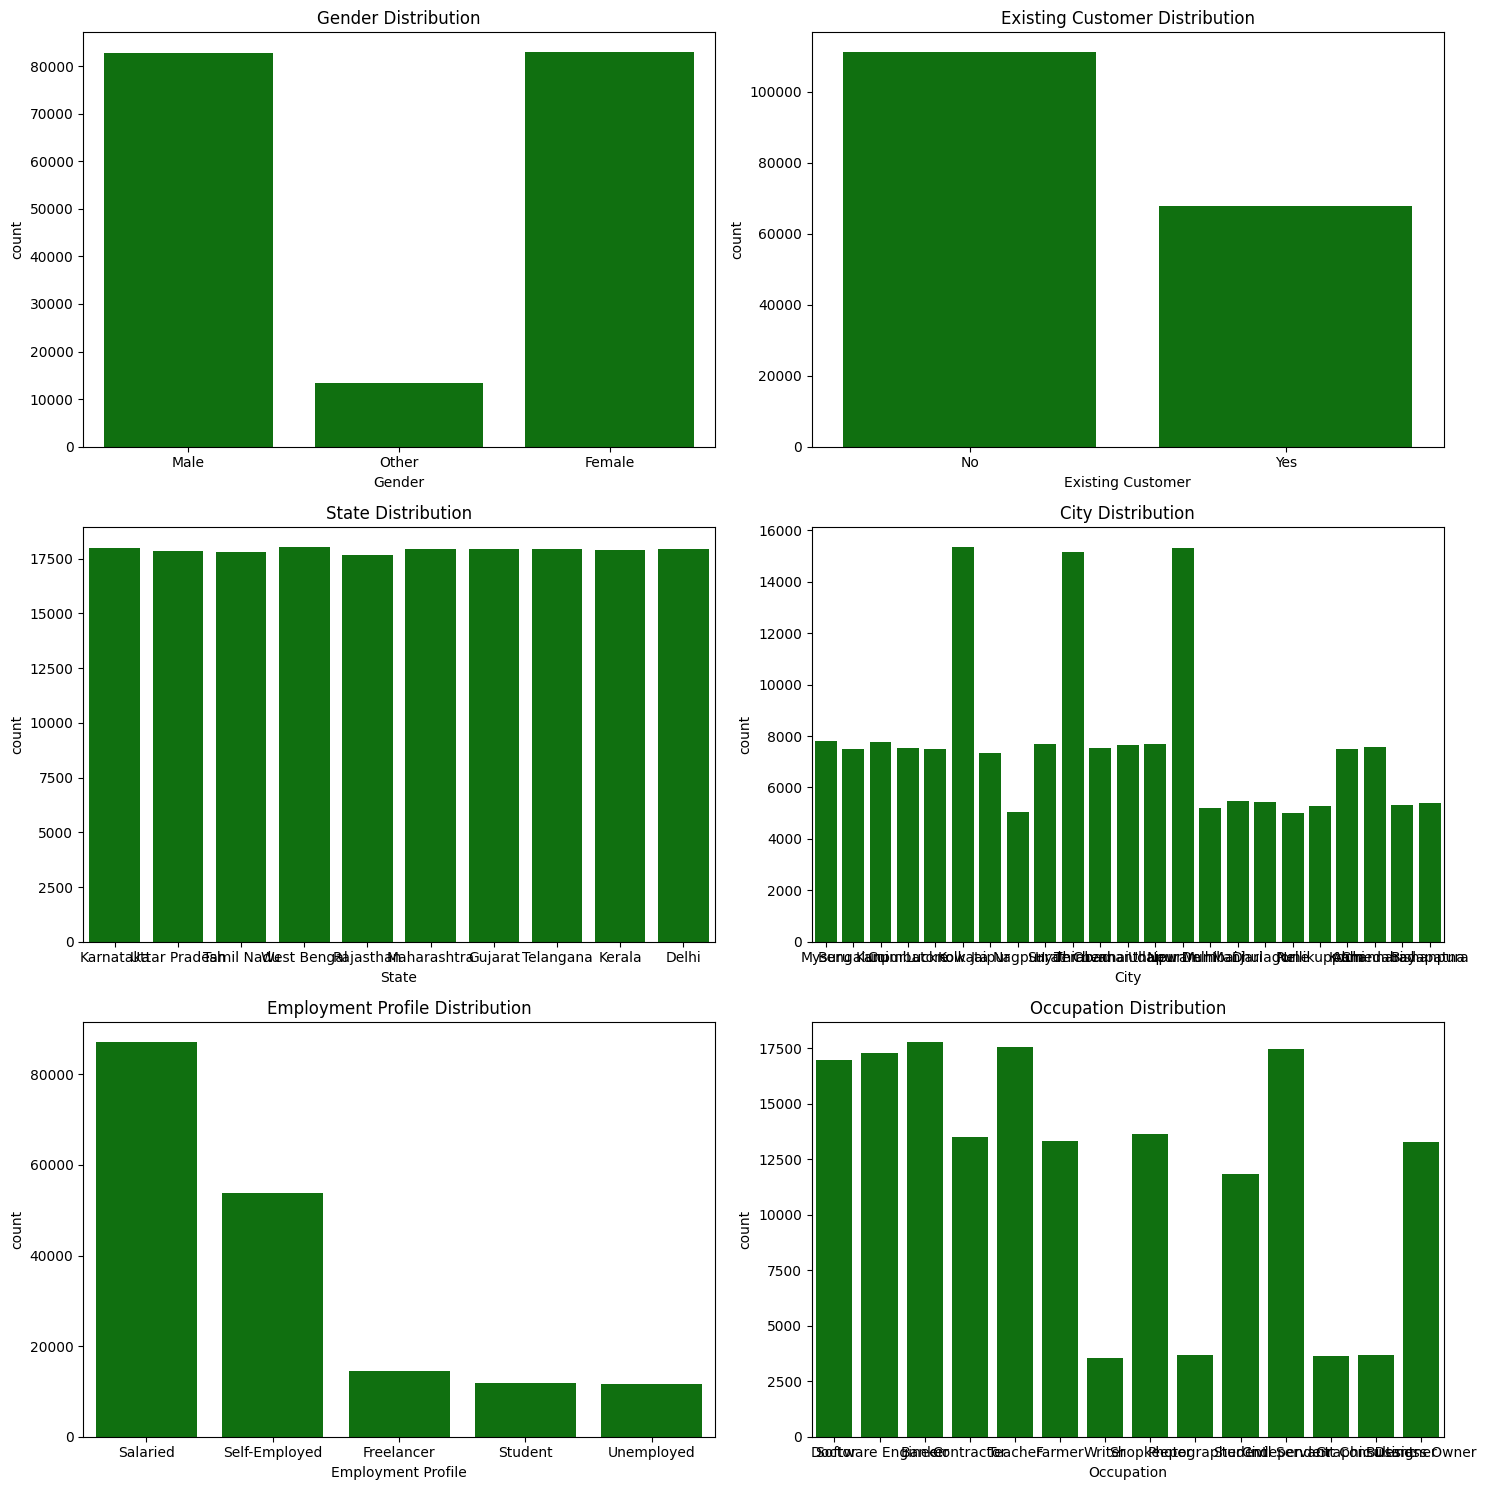

In [100]:
eda_univariate_analysis_categorical(df, categorical_features)

#### Univariate Analysis Insights (Categorical Features)
- Majority applications are from new customers
- Majority applicants are either Salaried of Self Employed

<a id="3.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Bivariate analysis with Target Variable</h3>

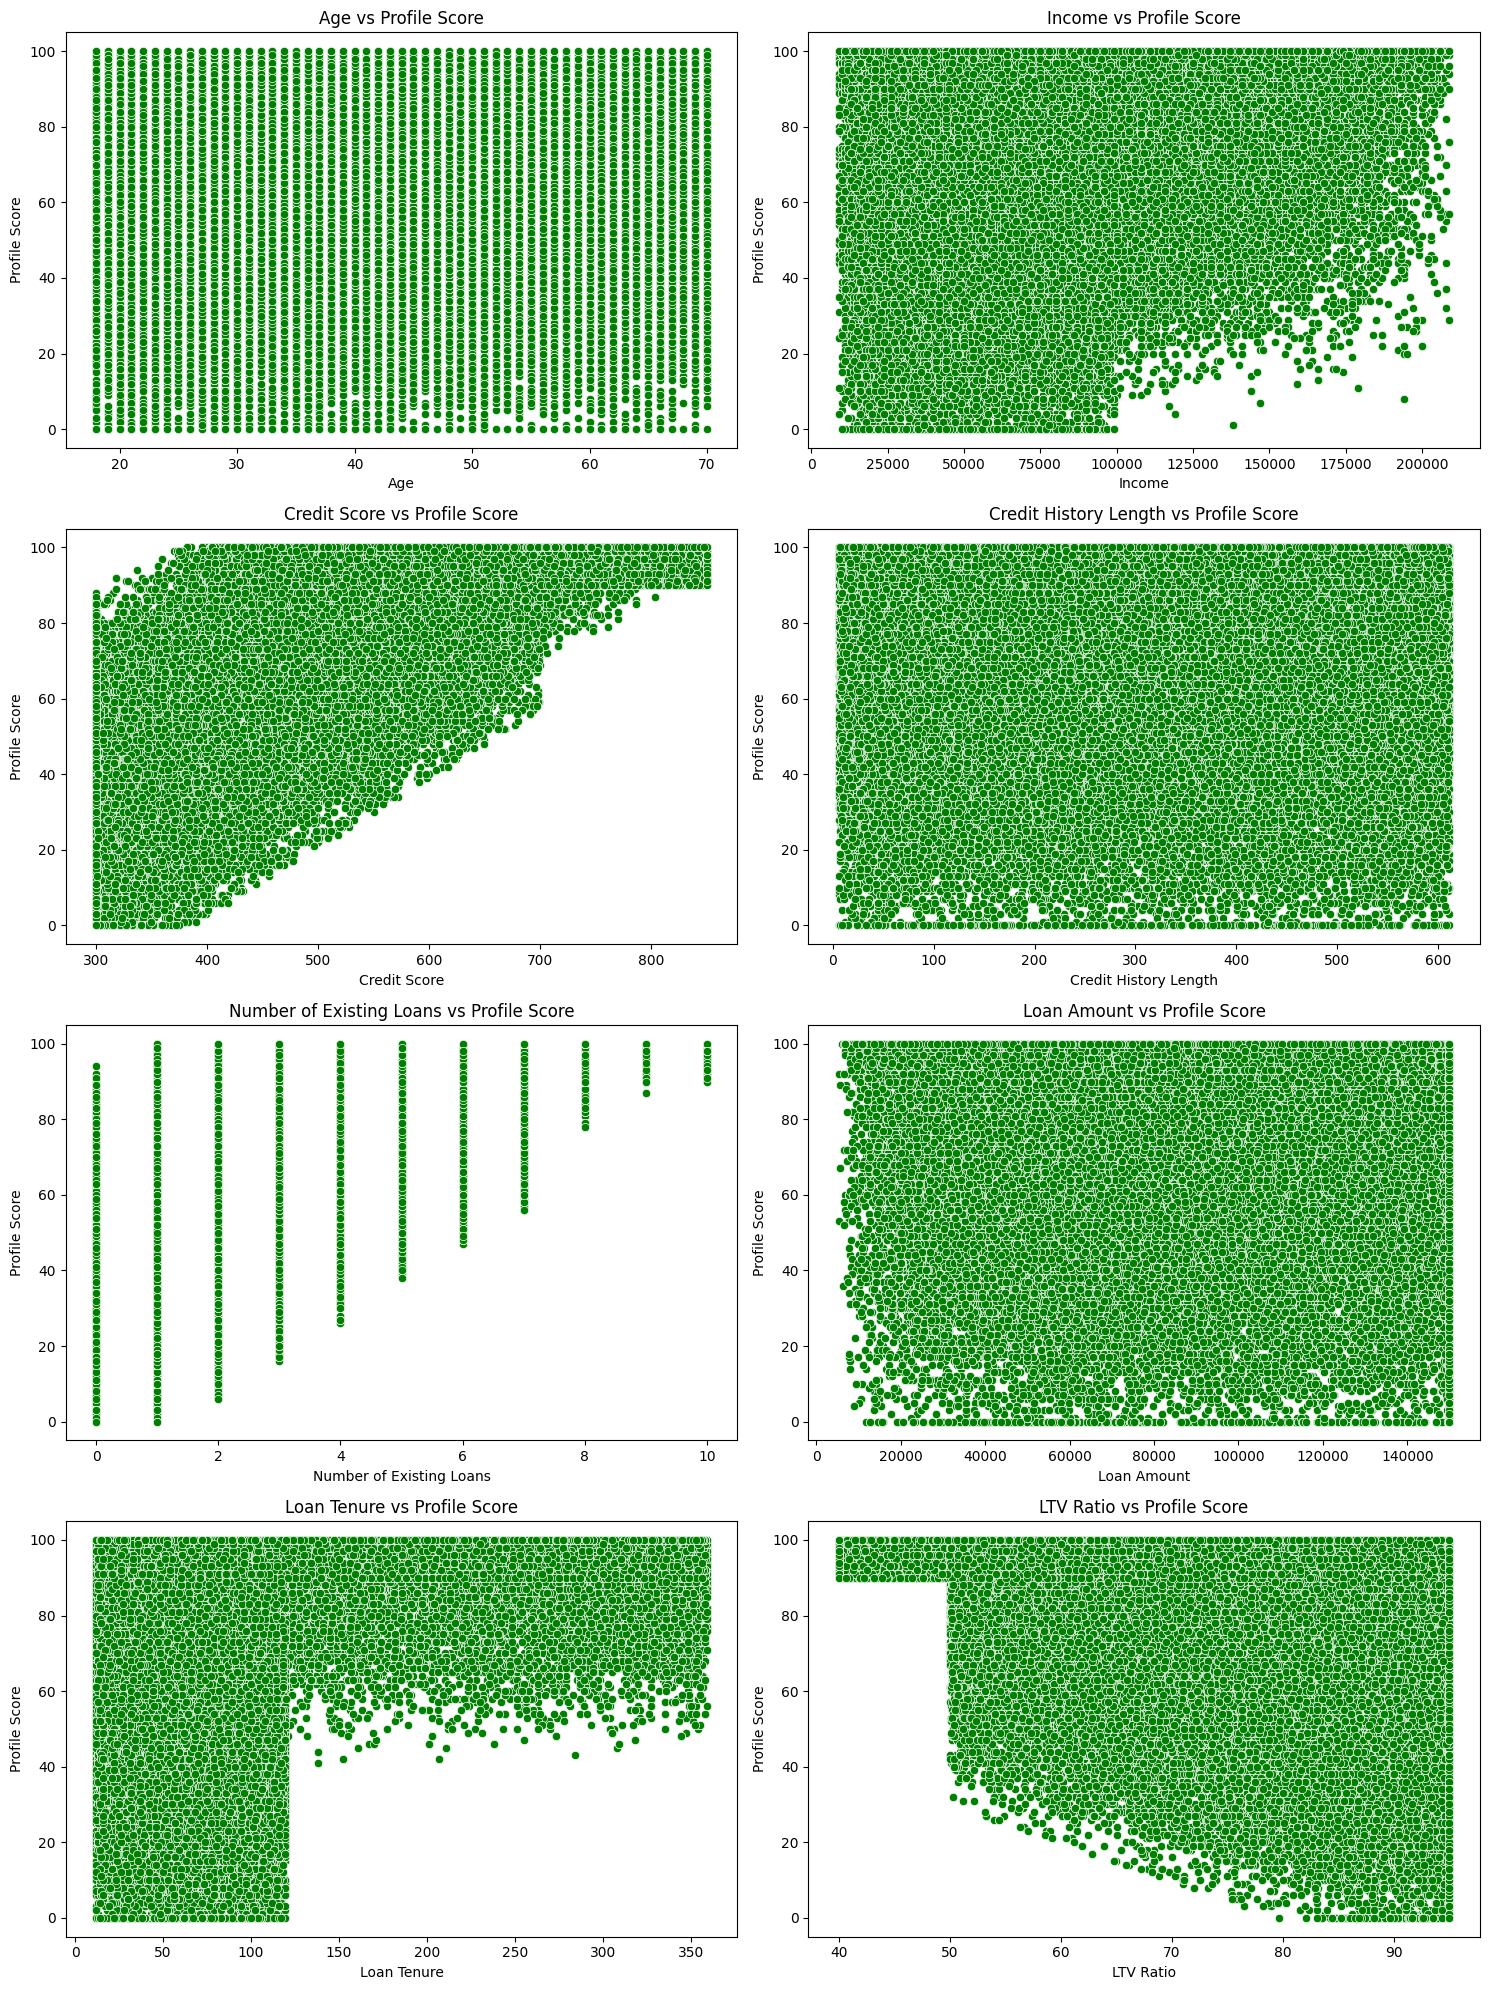

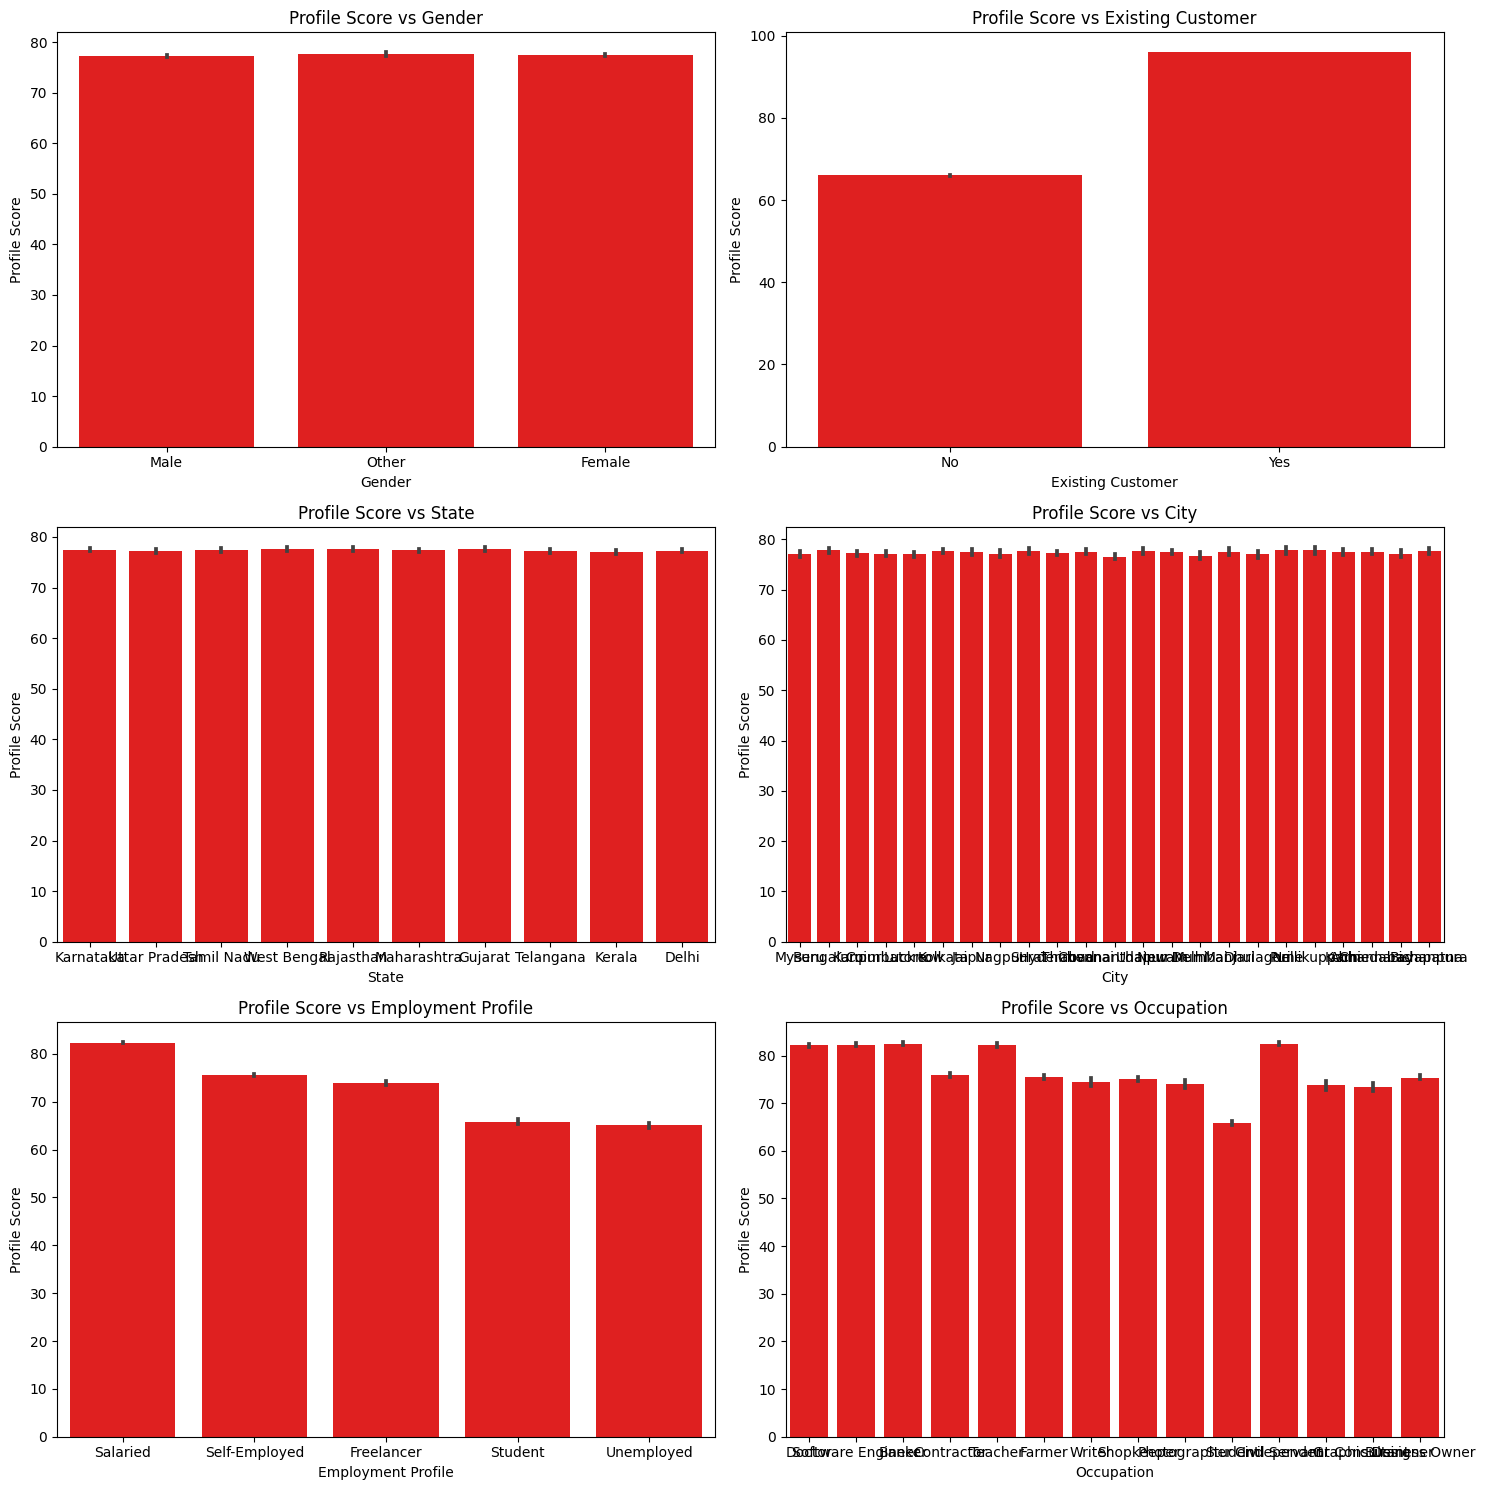

In [98]:
target_variable='Profile Score'    
eda_bivariate_analysis(df, categorical_features,numeric_features,target_variable)

### Bivariate Analysis Insights
- Higher the no of existing loans, higher the profile score
- Higher the credit score, higher the profile score
- Existing customer has relatively high profile score compared to new customers

<a id="3.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Correlation Matrix</h3>

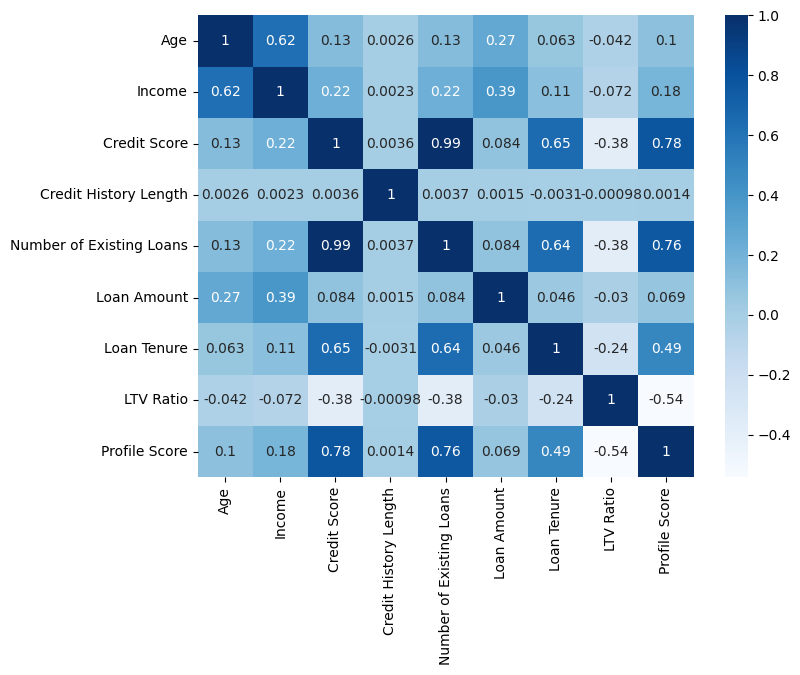

In [99]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True);

### Correlation Insights
- Credit score is highly correlated to Profile score and No of Existing loans
- LTV ratio is negatively correlated with Profile score
- Loan tenure and No of existing loans are also correlated
- Income and Age are Correlated